# Introducing convolutional neural networks


## Images as data: visualizations
To display image data, you will rely on Python's Matplotlib library, and specifically use matplotlib's pyplot sub-module, that contains many plotting commands. Some of these commands allow you to display the content of images stored in arrays.

### init

In [2]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO_pushto_fileio('bricks.png')
"""

tobedownloaded="""
{numpy.ndarray: {'bricks.png': 'https://file.io/GJ8xXK'}}
"""
prefixToc = '1.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")


Using TensorFlow backend.


Téléchargements à lancer

{numpy.ndarray: {"bricks.png": "https://file.io/GJ8xXK"}}

{'numpy.ndarray': {'bricks.png': 'https://file.io/GJ8xXK'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  103k    0  103k    0     0   132k      0 --:--:-- --:--:-- --:--:--  132k


### code

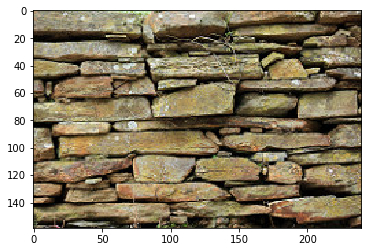

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread(prefix+'bricks.png')

# Display the image
plt.imshow(data)
plt.show()

## Images as data: changing images
To modify an image, you can modify the existing numbers in the array. In a color image, you can change the values in one of the color channels without affecting the other colors, by indexing on the last dimension of the array.

The image you imported in the previous exercise is available in data.

### code

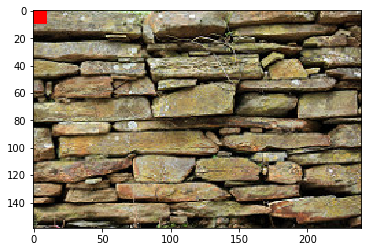

In [8]:
# Set the red channel in this part of the image to 1
data[:10,:10,0] = 1

# Set the green channel in this part of the image to 0
data[:10,:10,1] = 0

# Set the blue channel in this part of the image to 0
data[:10,:10,2] = 0

# Visualize the result
plt.imshow(data)
plt.show()

## Using one-hot encoding to represent images
Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner: each row in the array contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.

The fashion dataset contains three categories:

Shirts
Dresses
Shoes
In this exercise, you will create a one-hot encoding of a small sample of these labels.

### code

In [1]:
labels= ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

In [2]:
# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1

## Evaluating a classifier
To evaluate a classifier, we need to test it on images that were not used during training. This is called "cross-validation": a prediction of the class (e.g., t-shirt, dress or shoe) is made from each of the test images, and these predictions are compared with the true labels of these images.

The results of cross-validation are provided as one-hot encoded arrays: test_labels and predictions.

### init

In [3]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(test_labels, predictions)
"""

tobedownloaded="""
{numpy.ndarray: {'predictions.csv': 'https://file.io/mQVNzu',
  'test_labels.csv': 'https://file.io/ZfJi1C'}}
"""
prefixToc='1.4'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import loadNDArrayFromCsv
predictions = loadNDArrayFromCsv(prefix+'predictions.csv')
test_labels = loadNDArrayFromCsv(prefix+'test_labels.csv')


Using TensorFlow backend.


Téléchargements à lancer

{numpy.ndarray: {"predictions.csv": "https://file.io/mQVNzu",
  "test_labels.csv": "https://file.io/ZfJi1C"}}

{'numpy.ndarray': {'predictions.csv': 'https://file.io/mQVNzu', 'test_labels.csv': 'https://file.io/ZfJi1C'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   144    0   144    0     0    220      0 --:--:-- --:--:-- --:--:--   221
100   144    0   144    0     0    220      0 --:--:-- --:--:-- --:--:--   220
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   144    0   144    0     0    226      0 --:--:-- --:--:-- --:--:--   226


### code

In [4]:
# Calculate the number of correct predictions
number_correct = (predictions*test_labels).sum()
print(number_correct)

# Calculate the proportion of correct predictions
proportion_correct = number_correct/predictions.shape[0]
print(proportion_correct)

6.0
0.75


# Classification with Keras


## Build a neural network
We will use the Keras library to create neural networks and to train these neural networks to classify images. These models will all be of the Sequential type, meaning that the outputs of one layer are provided as inputs only to the next layer.

In this exercise, you will create a neural network with Dense layers, meaning that each unit in each layer is connected to all of the units in the previous layer. For example, each unit in the first layer is connected to all of the pixels in the input images. The Dense layer object receives as arguments the number of units in that layer, and the activation function for the units. For the first layer in the network, it also receives an input_shape keyword argument.

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the Keras Cheat Sheet and keep it handy!

### code

In [5]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

## Compile a neural network
Once you have constructed a model in Keras, the model needs to be compiled before you can fit it to data. This means that you need to specify the optimizer that will be used to fit the model and the loss function that will be used in optimization. Optionally, you can also specify a list of metrics that the model will keep track of. For example, if you want to know the classification accuracy, you will provide the list ['accuracy'] to the metrics keyword argument.

### code

In [6]:
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

## Fitting a neural network model to clothing data
In this exercise, you will fit the fully connected neural network that you constructed in the previous exercise to image data. The training data is provided as two variables: train_data that contains the pixel data for 50 images of the three clothing classes and train_labels, which contains one-hot encoded representations of the labels for each one of these 50 images. Transform the data into the network's expected input and then fit the model on training data and training labels.

The model you compiled in the previous exercise, and train_data and train_labels are available in your workspace.

### init

In [7]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO( train_data , train_labels, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'train_data[50_28_28_1].csv': 'https://file.io/tJeFTl',
  'train_labels[50_3].csv': 'https://file.io/x7PG0H'}}
"""
prefixToc = '2.3'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
train_data = getImage(prefix+'train_data[50_28_28_1].csv')
train_labels = getImage(prefix+'train_labels[50_3].csv')


Téléchargements à lancer

{numpy.ndarray: {"train_data[50_28_28_1].csv": "https://file.io/tJeFTl",
  "train_labels[50_3].csv": "https://file.io/x7PG0H"}}

{'numpy.ndarray': {'train_data[50_28_28_1].csv': 'https://file.io/tJeFTl', 'train_labels[50_3].csv': 'https://file.io/x7PG0H'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 30720    0 30720    0     0   8037      0 --:--:--  0:00:03 --:--:--  8039
100  313k    0  313k    0     0  78669      0 --:--:--  0:00:04 --:--:-- 78688
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0 

### code

In [9]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape((50, 784))

# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40 samples, validate on 10 samples
Epoch 1/3





40/40 [==============================] - 0s 5ms/step - loss: 1.0836 - acc: 0.3250 - val_loss: 1.0922 - val_acc: 0.7000
Epoch 2/3
40/40 [==============================] - 0s 112us/step - loss: 1.0766 - acc: 0.3500 - val_loss: 1.0915 - val_acc: 0.7000
Epoch 3/3
40/40 [==============================] - 0s 113us/step - loss: 1.0712 - acc: 0.4250 - val_loss: 1.0908 - val_acc: 0.7000


## Cross-validation for neural network evaluation
To evaluate the model, we use a separate test data-set. As in the train data, the images in the test data also need to be reshaped before they can be provided to the fully-connected network because the network expects one column per pixel in the input.

The model you fit in the previous exercise, and test_data and test_labels are available in your workspace.

### init

In [10]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO( test_data , test_labels, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'test_data[10_28_28_1].csv': 'https://file.io/TCNZAn',
  'test_labels[10_3].csv': 'https://file.io/Js3EAa'}}
"""
prefixToc = '2.4'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
test_data = getImage(prefix+'test_data[10_28_28_1].csv')
test_labels = getImage(prefix+'test_labels[10_3].csv')


Téléchargements à lancer

{numpy.ndarray: {"test_data[10_28_28_1].csv": "https://file.io/TCNZAn",
  "test_labels[10_3].csv": "https://file.io/Js3EAa"}}

{'numpy.ndarray': {'test_data[10_28_28_1].csv': 'https://file.io/TCNZAn', 'test_labels[10_3].csv': 'https://file.io/Js3EAa'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15360    0 15360    0     0  20954      0 --:--:-- --:--:-- --:--:-- 20954
100 63280    0 63280    0     0  84939      0 --:--:-- --:--:-- --:--:-- 84939
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   180    0   180    0     0    622      0 --:--:-- --:--:-- --:--:--   625


### code

In [14]:
# Reshape test data
test_data = test_data.reshape((10, 784))

# Evaluate the model
model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 50us/step


[1.1002861261367798, 0.20000000298023224]